# Fitting the distribution of heights data
## Instructions

In this assessment you will write code to perform a steepest descent to fit a Gaussian model to the distribution of heights data that was first introduced in *Mathematics for Machine Learning: Linear Algebra*.

The algorithm is the same as you encountered in *Gradient descent in a sandpit* but this time instead of descending a pre-defined function, we shall descend the $\chi^2$ (chi squared) function which is both a function of the parameters that we are to optimise, but also the data that the model is to fit to.

## How to submit

Complete all the tasks you are asked for in the worksheet. When you have finished and are happy with your code, press the **Submit Assingment** button at the top of this notebook.

## Get started
Run the cell below to load dependancies and generate the first figure in this worksheet.

In [ ]:
# Run this cell first to load the dependancies for this assessment,
# and generate the first figure.
import matplotlib
matplotlib.use("nbAgg")
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

def make_colormap(seq):
    seq = [(None,) * 3, 0.0] + list(seq) + [1.0, (None,) * 3]
    cdict = {'red': [], 'green': [], 'blue': []}
    for i, item in enumerate(seq):
        if isinstance(item, float):
            r1, g1, b1 = seq[i - 1]
            r2, g2, b2 = seq[i + 1]
            cdict['red'].append([item, r1, r2])
            cdict['green'].append([item, g1, g2])
            cdict['blue'].append([item, b1, b2])
    return mcolors.LinearSegmentedColormap('CustomMap', cdict)

magenta = (0xfc/255, 0x75/255, 0xdb/255) # Brighter magenta
orange = (218/255, 171/255, 115/255)
green = (175/255, 219/255, 133/255)
white = (240/255, 245/255, 250/255)
blue1 = (70/255, 101/255, 137/255)
blue2 = (122/255, 174/255, 215/255)

magentaTrans = (0xfc/255, 0x75/255, 0xdb/255, 0.5)
orangeTrans = (218/255, 171/255, 115/255, 0.625)
greenTrans = (175/255, 219/255, 133/255, 0.625)

blueMap = make_colormap([blue2, blue1])

def heights_data () :
    x = np.array([
    50, 52.5, 55, 57.5, # This row is padding
    60, 62.5, 65, 67.5, # This row is padding
    70, 72.5, 75, 77.5, # This row is padding
    80, 82.5, 85, 87.5, # This row is padding
    90, 92.5, 95, 97.5, # This row is padding
    100,102.5,105,107.5, # This row is padding
    110,112.5,115,117.5, # This row is padding
    120,122.5,125,127.5, # This row is padding
    130,132.5, # This row is padding
    135,137.5,140,142.5,145, # This row is padding
    147.5,150,152.5,155,157.5, # Also padding
    160,162.5,165,167.5,170,172.5,175,177.5,180,182.5,
    185,187.5,190,192.5,195,197.5,200,
    202.5,205,207.5, #Also padding
    210,212.5,215,217.5, # This row is padding
    220,222.5,225,227.5, # This row is padding
    230,232.5,235,237.5, # This row is padding
    240,242.5,245,247.5, # This row is padding
    250,252.5,255,257.5, # This row is padding
    260,262.5,265,267.5, # This row is padding
    270,272.5,275,277.5, # This row is padding
    280,282.5,285,287.5, # This row is padding
    290,292.5,295,297.5, # This row is padding
    ])
    width = x[1]-x[0]
    x = x + width / 2

    y = np.array([
    0,0,0,0,
    0,0,0,0,
    0,0,0,0,
    0,0,0,0,
    0,0,0,0,
    0,0,0,0,
    0,0,0,0,
    0,0,0,0,
    0,0,
    0,0,0,0,0,
    0,0,0,0,0,
    0.031,0.013,0.023,0.064,0.065,0.126,0.132,0.127,0.113,0.091,0.105,0.050,
    0.018,0.018,0.018,0.001,0,
    0,0,0,
    0,0,0,0,
    0,0,0,0,
    0,0,0,0,
    0,0,0,0,
    0,0,0,0,
    0,0,0,0,
    0,0,0,0,
    0,0,0,0,
    0,0,0,0,
    ])
    y /= np.sum(y) * width
    
    return x, y

def histogram(f, p):
    μ, σ = p
    binCentre, hist = heights_data()
  
    width = binCentre[1]-binCentre[0]
    bins = binCentre - width / 2

    lineColour = white
    barColour = greenTrans
    barColourUnder = magentaTrans
    barColourOver = orangeTrans
    xmin=130
    xmax=210
    ymax = 0.08
    labelFontSize=13

    fig,ax = plt.subplots(figsize=(8, 6), dpi= 80, facecolor=blue1)

    ax.set_xlim([xmin,xmax])
    ax.set_ylim([0,ymax])
    
    ax.set_xlabel("$x$", fontsize=14)
    ax.set_ylabel("$f(x)$", fontsize=14)

    xs = np.arange(xmin, xmax, 0.1)
    f = lambda x,μ,σ: np.exp(-(x-μ)**2/(2*σ**2))/np.sqrt(2*np.pi)/σ

    fμ = lambda x: f(x, μ, σ)
    fμxs = fμ(xs)
  
    SSR = np.linalg.norm(f(binCentre,μ,σ)-hist)**2

    xx = np.arange(xmin,xmax,(xmax-xmin)/100)
    yy = np.arange(0,ymax,(ymax)/100)
    X, Y = np.meshgrid(xx, yy)
    Z = ( (X - (xmax+xmin)/2)**2 + ((xmax-xmin)/ymax / 1.333)**2*(Y - ymax)**2 )**0.5 /( (xmin - (xmax+xmin)/2)**2 + ((xmax-xmin)/ymax / 1.333)**2*(0 - ymax)**2 )**0.5
    im = ax.imshow(Z, vmin=0, vmax=1, extent=[xmin, xmax, ymax, 0], cmap=blueMap)
    ax.set_aspect((xmax-xmin)/ymax / 1.333)
    
    histBelow = np.select([hist < fμ(binCentre)], [hist], fμ(binCentre))
    histAbove = np.abs(fμ(binCentre)-hist)
    histAbove1 = np.select([hist < fμ(binCentre)], [histAbove], 0)
    histAbove2 = np.select([hist >= fμ(binCentre)], [histAbove], 0)
    # The lines below are different from the code block. Here using 'bins' rather than 'binCentre'.
    ax.bar(binCentre, histBelow, width=width, color=barColour, edgecolor=green)
    ax.bar(binCentre, histAbove1, width=width, bottom=histBelow,
          color=barColourUnder, edgecolor=np.array(magenta)/2)
    ax.bar(binCentre, histAbove2, width=width, bottom=histBelow,
          color=barColourOver, edgecolor=orange)
    ax.plot(xs, fμxs, color=white, linewidth=2)

    ax.text(132, 0.074, "$\chi^2$ = " + str(SSR), fontsize=14, color=white)
    
    fig.show()

def contour(f, p) :
    binCentre, hist = heights_data()
    μmax = 200
    μmin = 150
    σmax = 35
    σmin = 2
    μs = np.arange(μmin,μmax+.5,.5)
    σs = np.arange(σmin,σmax+.5,.5)
    M, S = np.meshgrid(μs, σs)
    Z = ( (M - (μmax+μmin)/2)**2 + ((μmax-μmin)/σmax / 1.333)**2*(S - σmax)**2 )**0.5 /( (μmin - (μmax+μmin)/2)**2 + ((μmax-μmin)/σmax / 1.333)**2*(0 - σmax)**2 )**0.5

    fig,ax = plt.subplots(figsize=(8, 6), dpi= 80, facecolor=blue1)

    ax.set_xlim([μmin,μmax])
    ax.set_ylim([σmin,σmax])
    ax.set_aspect(1)

    ax.set_xlabel("$\mu / \mathrm{cm} $", fontsize=14)
    ax.set_ylabel("$\sigma / \mathrm{cm} $", fontsize=14)
    
    im = ax.imshow(Z, vmin=0, vmax=1, extent=[μmin, μmax, σmax, σmin], cmap=blueMap)


    z = ((f(binCentre.reshape(binCentre.size,1,1),μs.reshape(1,μs.size,1),σs.reshape(1,1,σs.size)) - hist.reshape(hist.size,1,1))**2).sum(axis=0)
    ax.contour(np.outer(μs, np.ones_like(σs)),np.outer(np.ones_like(μs), σs),z,20, colors=[green], linewidths=1.5)

    ax.plot(p.T[0], p.T[1], 'o-', linewidth=2, color=magenta)
    ax.plot([p.T[0,-1]], [p.T[1,-1]], 'o-', linewidth=2, color=orange, markersize=8)

    fig.show()
    
histogram(lambda x,mu,sig : np.exp(-(x-mu)**2/(2*sig**2)) / np.sqrt(2*np.pi) / sig, [160, 15])

<IPython.core.display.Javascript object>

## Background
If we have data for the heights of people in a population, it can be plotted as a histogram, i.e., a bar chart where each bar has a width representing a range of heights, and an area which is the probability of finding a person with a height in that range.
We can look to model that data with a function, such as a Gaussian, which we can specify with two parameters, rather than holding all the data in the histogram.

The Gaussian function is given as,
$$f(\mathbf{x};\mu, \sigma) = \frac{1}{\sigma\sqrt{2\pi}}\exp\left(-\frac{(\mathbf{x} - \mu)^2}{2\sigma^2}\right)$$

The figure above shows the data in orange, the model in magenta, and where they overlap in green.
This particular model has not been fit well - there is not a strong overlap.

Recall from the videos the definition of $\chi^2$ as the squared difference of the data and the model, i.e $\chi^2 = |\mathbf{y} - f(\mathbf{x};\mu, \sigma)|^2$. This is represented in the figure as the sum of the squares of the pink and orange bars.

Don't forget that $\mathbf{x}$ an $\mathbf{y}$ are represented as vectors here, as these are lists of all of the data points, the |*abs-squared*|${}^2$ encodes squaring and summing of the residuals on each bar.

To improve the fit, we will want to alter the parameters $\mu$ and $\sigma$, and ask how that changes the $\chi^2$.
That is, we will need to calculate the Jacobian,
$$ \mathbf{J} = \left[ \frac{\partial ( \chi^2 ) }{\partial \mu} , \frac{\partial ( \chi^2 ) }{\partial \sigma} \right]\;. $$

Let's look at the first term, $\frac{\partial ( \chi^2 ) }{\partial \mu}$, using the multi-variate chain rule, this can be written as,
$$ \frac{\partial ( \chi^2 ) }{\partial \mu} = -2 (\mathbf{y} - f(\mathbf{x};\mu, \sigma)) \cdot \frac{\partial f}{\partial \mu}(\mathbf{x};\mu, \sigma)$$
With a similar expression for $\frac{\partial ( \chi^2 ) }{\partial \sigma}$; try and work out this expression for yourself.

The Jacobians rely on the derivatives $\frac{\partial f}{\partial \mu}$ and $\frac{\partial f}{\partial \sigma}$.
Write functions below for these.

In [ ]:
# PACKAGE
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# GRADED FUNCTION

# This is the Gaussian function.
def f (x,mu,sig) :
    return np.exp(-(x-mu)**2/(2*sig**2)) / np.sqrt(2*np.pi) / sig

# Next up, the derivative with respect to μ.
# If you wish, you may want to express this as f(x, mu, sig) multiplied by chain rule terms.
# === COMPLETE THIS FUNCTION ===
def dfdmu (x,mu,sig) :
    return f(x, mu, sig) * (x-mu)/sig**2

# Finally in this cell, the derivative with respect to σ.
# === COMPLETE THIS FUNCTION ===
def dfdsig (x,mu,sig) :
    return -f(x, mu, sig)/sig + f(x, mu, sig) * (x-mu)**2/sig**3

Next recall that steepest descent shall move around in parameter space proportional to the negative of the Jacobian,
i.e., $\begin{bmatrix} \delta\mu \\ \delta\sigma \end{bmatrix} \propto -\mathbf{J} $, with the constant of proportionality being the *aggression* of the algorithm.

Modify the function below to include the $\frac{\partial ( \chi^2 ) }{\partial \sigma}$ term of the Jacobian, the $\frac{\partial ( \chi^2 ) }{\partial \mu}$ term has been included for you.

In [ ]:
# GRADED FUNCTION

# Complete the expression for the Jacobian, the first term is done for you.
# Implement the second.
# === COMPLETE THIS FUNCTION ===
def steepest_step (x, y, mu, sig, aggression) :
    J = np.array([
        -2*(y - f(x,mu,sig)) @ dfdmu(x,mu,sig),
        -2*(y - f(x,mu,sig)) @ dfdsig(x,mu,sig) # Replace the ??? with the second element of the Jacobian.
    ])
    step = -J * aggression
    return step

## Test your code before submission
To test the code you've written above, run all previous cells (select each cell, then press the play button [ ▶| ] or press shift-enter).
You can then use the code below to test out your function.
You don't need to submit these cells; you can edit and run them as much as you like.

<IPython.core.display.Javascript object>


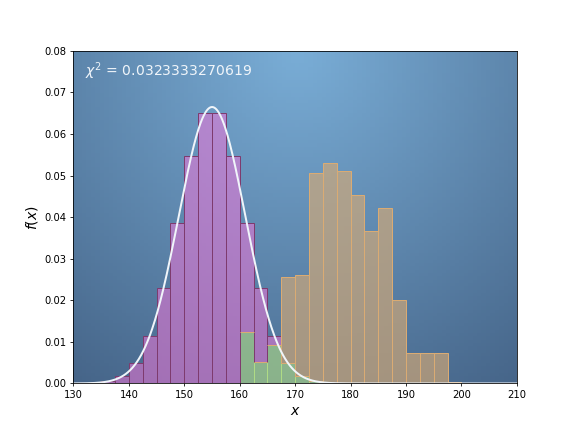

<IPython.core.display.Javascript object>


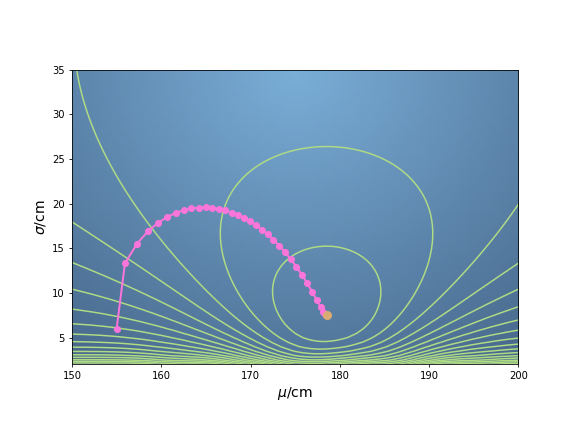

<IPython.core.display.Javascript object>


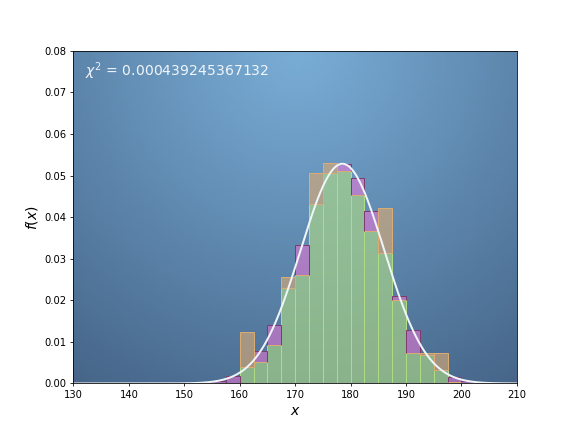

In [ ]:
# First get the heights data, ranges and frequencies
x,y = heights_data()

# Next we'll assign trial values for these.
mu = 155 ; sig = 6
# We'll keep a track of these so we can plot their evolution.
p = np.array([[mu, sig]])

# Plot the histogram for our parameter guess
histogram(f, [mu, sig])
# Do a few rounds of steepest descent.
for i in range(50) :
    dmu, dsig = steepest_step(x, y, mu, sig, 2000)
    mu += dmu
    sig += dsig
    p = np.append(p, [[mu,sig]], axis=0)
# Plot the path through parameter space.
contour(f, p)
# Plot the final histogram.
histogram(f, [mu, sig])

Note that the path taken through parameter space is not necesarily the most direct path, as with steepest descent we always move perpendicular to the contours.